In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
# read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

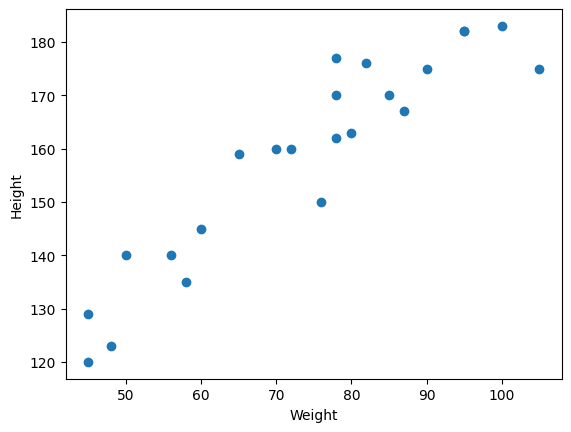

In [12]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [16]:
# divide dataset in indepedent and dependent features
x=df[['Weight']] ##indepdendent
y=df['Height'] ##dependent

In [17]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
# standardized  train independent ftrs
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

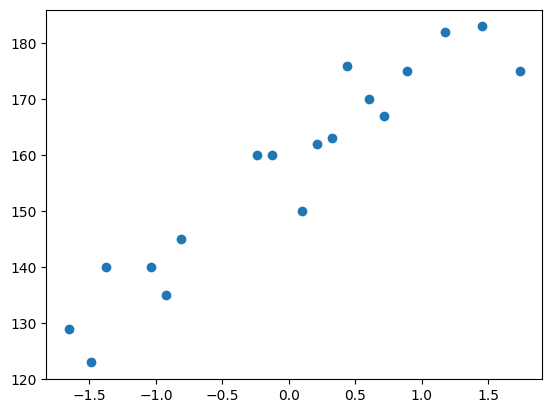

In [21]:
plt.scatter(x_train,y_train)

In [22]:
# train model simple Linear Regression Model
from sklearn.linear_model import LinearRegression
linearreg=LinearRegression()

In [23]:
linearreg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
print('slope or coefficuent',linearreg.coef_)

slope or coefficuent [17.03440872]


In [26]:
print('Intercept:',linearreg.intercept_)

Intercept: 157.5


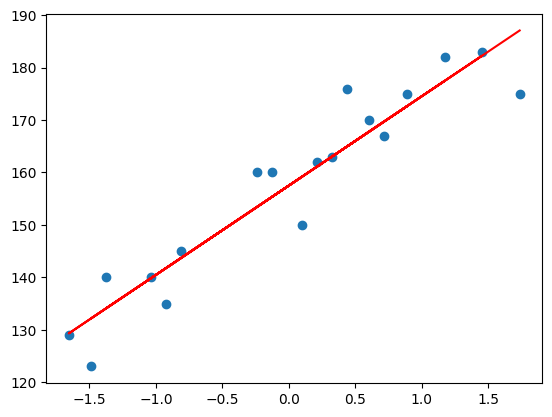

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_train,linearreg.predict(x_train),'r-')

In [35]:
y_pred_test=linearreg.predict(x_test)

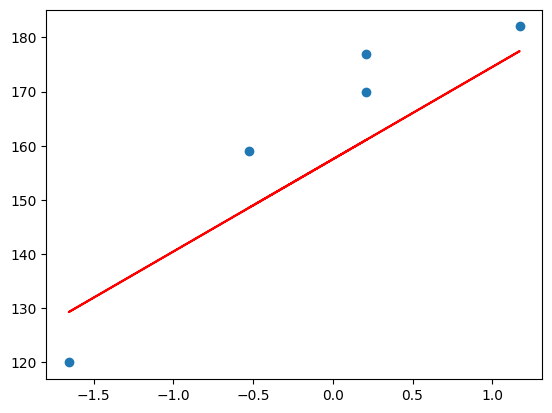

In [38]:
plt.scatter(x_test,y_test)
plt.plot(x_test,linearreg.predict(x_test),'r-')

In [39]:
# performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [42]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

In [44]:
# new data point
scaled_weight=scaler.transform([[80]])

/Users/deepakgulati/Desktop/Python Udemy/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
scaled_weight

array([[0.32350772]])

In [48]:
linearreg.predict(scaled_weight[[0]])

array([163.01076266])

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

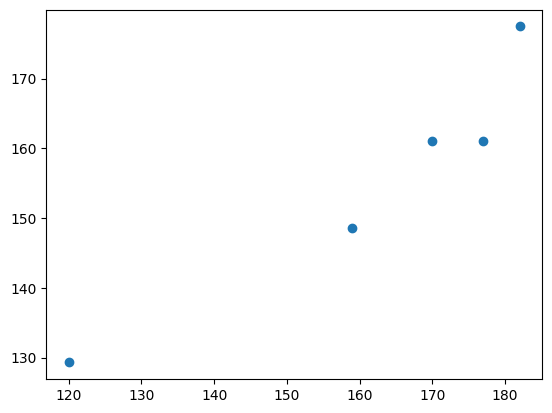

In [51]:
plt.scatter(y_test,y_pred_test)
residuals=y_test-y_pred_test
residuals

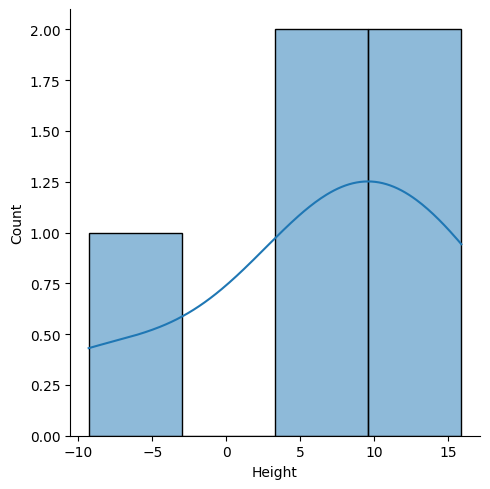

In [53]:
import seaborn as sns
sns.displot(residuals,kde=True)